In [1]:
import MetaTrader5 as mt5
import time
import streamlit as st

In [8]:
mt5.initialize()

True

In [9]:
winfut= mt5.symbol_info_tick

In [25]:
import pytz

In [27]:
from datetime import datetime

In [33]:
timezone = pytz.timezone("Etc/GMT-3")

inicio = datetime(2021, 10, 18, hour = 15, tzinfo = timezone)
fim = datetime(2021, 9, 27, hour = 17, tzinfo = timezone)

In [34]:
import pandas as pd

<AxesSubplot:xlabel='time'>

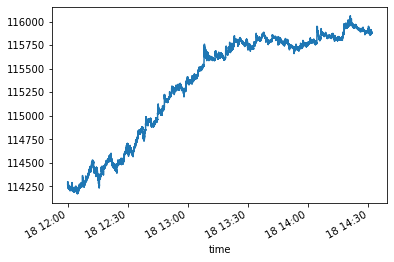

In [38]:
dados = mt5.copy_ticks_from("WINZ21",inicio,500000, mt5.COPY_TICKS_ALL)

# a partir dos dados recebidos criamos o DataFrame
dados_frame = pd.DataFrame(dados)

# convertemos o tempo em segundos no formato datetime
dados_frame['time']=pd.to_datetime(dados_frame['time'], unit='s')

dados_frame.index = dados_frame['time']
dados_frame['last'].plot()

In [22]:
mt5.copy_rates_from_pos('WINZ21',mt5.TIMEFRAME_D1, 0, 5000)

array([(1628467200, 125300., 125300., 125300., 125300.,       1, 5,        1),
       (1629158400, 119295., 119295., 118665., 118665.,       2, 5,        2),
       (1629244800, 120200., 121000., 118500., 118525.,       8, 5,        8),
       (1629331200, 117075., 119600., 116730., 119600.,      36, 5,       36),
       (1629417600, 118115., 120640., 117900., 120170.,     338, 5,      341),
       (1629676800, 121105., 121105., 119300., 119705.,      15, 5,       16),
       (1629763200, 120265., 122525., 120265., 122410.,      36, 5,       41),
       (1629849600, 122385., 122745., 121615., 122745.,       6, 5,        6),
       (1629936000, 122485., 122485., 120460., 120460.,      18, 5,       18),
       (1630022400, 121300., 122800., 121300., 122400.,      19, 5,       28),
       (1630281600, 122100., 122385., 121500., 121740.,      36, 5,       55),
       (1630368000, 121360., 122150., 119870., 120460.,      85, 5,      423),
       (1630454400, 120670., 121985., 120015., 12099

In [11]:
ativo = 'WINZ21'

In [12]:
winfut(ativo)

In [44]:
ativo = mt5.symbol_info_tick("WINZ21")

In [45]:
ativo.last

115865.0

In [48]:
import sys

In [52]:
while(True):
    ativo = mt5.symbol_info_tick("WINZ21")
    print("\r" + str(ativo.last))
    sys.stdout.flush()
    
    time.sleep(0.5)

115830.0
115835.0
115830.0
115835.0
115830.0
115830.0
115830.0
115830.0
115835.0
115830.0
115835.0
115840.0
115835.0


KeyboardInterrupt: 

In [ ]:
import sys
import MetaTrader5 as mt5
import time

mt5.initialize()

while(True):
    ativo = mt5.symbol_info_tick("WINZ21")
    sys.stdout.write("\r" + str(ativo.last))
    sys.stdout.flush()
    
    time.sleep(0.5)

107730.0

In [ ]:
import sys
import MetaTrader5 as mt5
import time
import streamlit as st

In [ ]:
mt5.initialize()

In [53]:
while(True):
    ativo = mt5.symbol_info_tick("WINZ21")
    sys.stdout.write("\r" + str(ativo.last))
    sys.stdout.flush()
    
    time.sleep(0.5)

115735.0

KeyboardInterrupt: 

In [8]:
import time
import sys

for i in range(1000):
    #print(i)
    sys.stdout.write('\r' + str(i))
    #sys.stdout.flush()
    time.sleep(1)

999

# 1. Checklist

Funções básicas que devemos fazer com o metatrader

1. Instalar Metatrader

2. Configurar Metatrader junto à sua corretora de preferência

3. Instalar biblioteca Metatrader5 no Python

4. Abrir Metatrader via Python

5. Obter dados de ativos do Metatrader via Python

    5.1. Dados de ticks
    
    5.2. Dados de negociação
    
    5.3. Dados de oferta (books)
    
    5.4. Dados de volume
    
  
6. Como mandar ordens pelo Python

# 2. Abrindo bibliotecas

In [63]:
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import MetaTrader5 as mt5
import pytz

# 3. Primeiros passos

Se a sua conta estiver OK junto à corretora, login será automático ao acionar o Metatrader pelo método abaixo

In [269]:
mt5.initialize()

True

Uma outra opção é pedir que ele exiba uma mensagem caso a inicialização não funcione

In [71]:
# conecte-se ao MetaTrader 5
if not mt5.initialize():
    print("initialize() failed")
    mt5.shutdown()

Você também pode fazer o login pelo Python, embora não preciso aqui pois o software já possui minhas informações de login

In [ ]:
mt5.login(
   login,                    # número da conta
   password="PASSWORD",      # senha
   server="SERVER",          # nome do servidor como definido no terminal
   timeout=TIMEOUT           # tempo de espera esgotado (opcional)
   )

In [4]:
# obtemos informações sobre a versão do MetaTrader 5
mt5.version()

(500, 2981, '21 Jun 2021')

In [5]:
# consultamos o estado e os parâmetros de conexão
mt5.terminal_info()

TerminalInfo(community_account=False, community_connection=False, connected=True, dlls_allowed=False, trade_allowed=False, tradeapi_disabled=False, email_enabled=False, ftp_enabled=False, notifications_enabled=False, mqid=False, build=2981, maxbars=100000, codepage=1252, ping_last=6156, community_balance=0.0, retransmission=0.0, company='MetaQuotes Software Corp.', name='MetaTrader 5', language='Portuguese (Brazil)', path='C:\\Program Files\\MetaTrader 5', data_path='C:\\Users\\victo\\AppData\\Roaming\\MetaQuotes\\Terminal\\D0E8209F77C8CF37AD8BF550E51FF075', commondata_path='C:\\Users\\victo\\AppData\\Roaming\\MetaQuotes\\Terminal\\Common')

In [9]:
mt5.account_info()

AccountInfo(login=1000080735, trade_mode=2, leverage=1, limit_orders=0, margin_so_mode=1, trade_allowed=True, trade_expert=True, margin_mode=0, currency_digits=2, fifo_close=False, balance=0.0, credit=0.0, profit=0.0, equity=0.0, margin=0.0, margin_free=0.0, margin_level=0.0, margin_so_call=0.0, margin_so_so=0.0, margin_initial=0.0, margin_maintenance=0.0, assets=0.0, liabilities=0.0, commission_blocked=0.0, name='VICTOR NOGUEIRA CORTEZ GOMES', server='ClearInvestimentos-CLEAR', currency='BRL', company='Clear (XP Investimentos CCTVM)')

Quantos instrumentos financeiros?

In [10]:
mt5.symbols_total()

21961

Que ticks são esses?

In [16]:
mt5.symbols_get('AAPL')

(SymbolInfo(custom=False, chart_mode=1, select=False, visible=False, session_deals=0, session_buy_orders=0, session_sell_orders=0, volume=0, volumehigh=0, volumelow=0, time=0, digits=2, spread=0, spread_float=True, ticks_bookdepth=32, trade_calc_mode=32, trade_mode=4, start_time=0, expiration_time=0, trade_stops_level=0, trade_freeze_level=0, trade_exemode=3, swap_mode=0, swap_rollover3days=3, margin_hedged_use_leg=False, expiration_mode=2, filling_mode=3, order_mode=127, order_gtc_mode=0, option_mode=0, option_right=0, bid=0.0, bidhigh=0.0, bidlow=0.0, ask=0.0, askhigh=0.0, asklow=0.0, last=0.0, lasthigh=0.0, lastlow=0.0, volume_real=0.0, volumehigh_real=0.0, volumelow_real=0.0, option_strike=0.0, point=0.01, trade_tick_value=0.01, trade_tick_value_profit=0.01, trade_tick_value_loss=0.01, trade_tick_size=0.01, trade_contract_size=1.0, trade_accrued_interest=0.0, trade_face_value=0.0, trade_liquidity_rate=0.0, volume_min=1.0, volume_max=1653017000.0, volume_step=1.0, volume_limit=0.0, 

In [29]:
dict_weg = mt5.symbols_get('WEGE')[0]._asdict()

In [30]:
dict_weg['path']

'BOVESPA\\A VISTA\\WEGE3'

In [33]:
mt5.symbol_info("WEGE3")

SymbolInfo(custom=False, chart_mode=1, select=True, visible=True, session_deals=9760, session_buy_orders=0, session_sell_orders=0, volume=100, volumehigh=23200, volumelow=100, time=1632748956, digits=2, spread=1, spread_float=True, ticks_bookdepth=32, trade_calc_mode=32, trade_mode=4, start_time=0, expiration_time=0, trade_stops_level=0, trade_freeze_level=0, trade_exemode=3, swap_mode=0, swap_rollover3days=3, margin_hedged_use_leg=False, expiration_mode=2, filling_mode=3, order_mode=127, order_gtc_mode=0, option_mode=0, option_right=0, bid=40.96, bidhigh=41.14, bidlow=40.42, ask=40.97, askhigh=41.16, asklow=40.45, last=40.97, lasthigh=41.16, lastlow=40.42, volume_real=100.0, volumehigh_real=23200.0, volumelow_real=100.0, option_strike=0.0, point=0.01, trade_tick_value=0.01, trade_tick_value_profit=0.01, trade_tick_value_loss=0.01, trade_tick_size=0.01, trade_contract_size=1.0, trade_accrued_interest=0.0, trade_face_value=0.0, trade_liquidity_rate=0.0, volume_min=100.0, volume_max=4197

In [34]:
mt5.symbol_info_tick("WEGE3")

Tick(time=1632748989, bid=40.97, ask=40.98, last=40.97, volume=100, time_msc=1632748989355, flags=6, volume_real=100.0)

In [35]:
mt5.symbol_info_tick("WEGE3")

Tick(time=1632748989, bid=40.97, ask=40.98, last=40.97, volume=100, time_msc=1632748989355, flags=6, volume_real=100.0)

In [36]:
mt5.symbol_info_tick("WEGE3")

Tick(time=1632749023, bid=40.97, ask=40.98, last=40.98, volume=100, time_msc=1632749023245, flags=0, volume_real=100.0)

In [37]:
import time

t_end = time.time() + 60 * 1

In [38]:
import time

t_end = time.time() + 60 * 1

while time.time() < t_end:

    x = mt5.symbol_info_tick("PETR4")
    
    print(x)

    time.sleep(2)

Tick(time=1632749229, bid=27.39, ask=27.41, last=27.41, volume=100, time_msc=1632749229820, flags=0, volume_real=100.0)
Tick(time=1632749232, bid=27.39, ask=27.41, last=27.39, volume=100, time_msc=1632749232268, flags=0, volume_real=100.0)
Tick(time=1632749233, bid=27.39, ask=27.41, last=27.39, volume=200, time_msc=1632749233455, flags=88, volume_real=200.0)
Tick(time=1632749236, bid=27.39, ask=27.41, last=27.4, volume=1000, time_msc=1632749236520, flags=0, volume_real=1000.0)
Tick(time=1632749238, bid=27.39, ask=27.41, last=27.41, volume=100, time_msc=1632749238599, flags=0, volume_real=100.0)
Tick(time=1632749240, bid=27.38, ask=27.4, last=27.4, volume=300, time_msc=1632749240596, flags=56, volume_real=300.0)
Tick(time=1632749241, bid=27.38, ask=27.4, last=27.38, volume=100, time_msc=1632749241017, flags=0, volume_real=100.0)
Tick(time=1632749244, bid=27.38, ask=27.4, last=27.38, volume=400, time_msc=1632749244673, flags=88, volume_real=400.0)
Tick(time=1632749246, bid=27.38, ask=27.

Quando terminarmos as nossas tarefas

In [6]:
# concluímos a conexão ao terminal MetaTrader 5
mt5.shutdown()

True

In [30]:
ativo = 'ITUB4'

## Pesquisando por símbolos

In [19]:
mt5.symbols_get(group="WIN")

(SymbolInfo(custom=False, chart_mode=1, select=False, visible=False, session_deals=0, session_buy_orders=0, session_sell_orders=0, volume=0, volumehigh=0, volumelow=0, time=0, digits=0, spread=0, spread_float=True, ticks_bookdepth=32, trade_calc_mode=33, trade_mode=0, start_time=0, expiration_time=0, trade_stops_level=0, trade_freeze_level=0, trade_exemode=3, swap_mode=0, swap_rollover3days=3, margin_hedged_use_leg=False, expiration_mode=2, filling_mode=3, order_mode=127, order_gtc_mode=2, option_mode=0, option_right=0, bid=0.0, bidhigh=0.0, bidlow=0.0, ask=0.0, askhigh=0.0, asklow=0.0, last=0.0, lasthigh=0.0, lastlow=0.0, volume_real=0.0, volumehigh_real=0.0, volumelow_real=0.0, option_strike=0.0, point=1.0, trade_tick_value=0.2, trade_tick_value_profit=0.2, trade_tick_value_loss=0.2, trade_tick_size=1.0, trade_contract_size=1.0, trade_accrued_interest=0.0, trade_face_value=0.0, trade_liquidity_rate=0.0, volume_min=1.0, volume_max=10000.0, volume_step=1.0, volume_limit=0.0, swap_long=

Link de referencia: https://www.mql5.com/pt/docs/integration/python_metatrader5/mt5copyratesfrompos_py

In [53]:
mt5.market_book_add('PATI3')

True

In [55]:
mt5.market_book_get('PATI3')

(BookInfo(type=1, price=75.0, volume=200, volume_dbl=200.0),
 BookInfo(type=1, price=74.7, volume=300, volume_dbl=300.0))

# 4. Obtendo dados propriamente ditos

## 4.1 Função copy_rates_from_pos

In [ ]:
ativo = mt5.copy_rates_from_pos('WIN$',mt5.TIMEFRAME_D1, 0, 5000)

In [13]:
ativo = pd.DataFrame(ativo)

In [14]:
ativo

,time,open,high,low,close,tick_volume,spread,real_volume
0,1473120000,78713.0,79169.0,77894.0,79136.0,211517,1,569070
1,1473292800,78778.0,79429.0,78590.0,79038.0,204705,1,552981
2,1473379200,78778.0,78778.0,75649.0,75721.0,263492,1,767040
3,1473638400,75226.0,77100.0,75226.0,76918.0,291905,1,785707
4,1473724800,76436.0,76501.0,74166.0,74706.0,315588,1,851984
...,...,...,...,...,...,...,...,...
1232,1630454400,119400.0,120615.0,118625.0,119180.0,5144525,1,20338473
1233,1630540800,119595.0,119735.0,116920.0,117160.0,5751495,1,22396328
1234,1630627200,117665.0,118350.0,116085.0,116855.0,5236082,1,19873990
1235,1630886400,117200.0,118585.0,116530.0,118370.0,3748279,1,14006225


In [15]:
ativo['time'] = pd.to_datetime(ativo['time'], unit='s')

In [16]:
ativo.head()

,time,open,high,low,close,tick_volume,spread,real_volume
0,2016-09-06,78713.0,79169.0,77894.0,79136.0,211517,1,569070
1,2016-09-08,78778.0,79429.0,78590.0,79038.0,204705,1,552981
2,2016-09-09,78778.0,78778.0,75649.0,75721.0,263492,1,767040
3,2016-09-12,75226.0,77100.0,75226.0,76918.0,291905,1,785707
4,2016-09-13,76436.0,76501.0,74166.0,74706.0,315588,1,851984


In [17]:
ativo.tail()

,time,open,high,low,close,tick_volume,spread,real_volume
1232,2021-09-01,119400.0,120615.0,118625.0,119180.0,5144525,1,20338473
1233,2021-09-02,119595.0,119735.0,116920.0,117160.0,5751495,1,22396328
1234,2021-09-03,117665.0,118350.0,116085.0,116855.0,5236082,1,19873990
1235,2021-09-06,117200.0,118585.0,116530.0,118370.0,3748279,1,14006225
1236,2021-09-08,117150.0,117980.0,113570.0,113875.0,1622952,0,23824170


In [120]:
mt5.initialize()

# importamos o módulo pytz para trabalhar com o fuso horário
import pytz

In [121]:
# definimos o fuso horário como UTC
timezone = pytz.timezone("Etc/UTC")

In [122]:

# criamos o objeto datetime no fuso horário UTC para que não seja aplicado o deslocamento do fuso horário local
#utc_from = datetime(2021, 9, 3, tzinfo=timezone)

In [123]:
from datetime import datetime
today= datetime.today()

In [124]:
# recebemos 10 barras de EURUSD H4 a partir de 01/10/2019 no fuso horário UTC
rates = mt5.copy_rates_from("PETR4", mt5.TIMEFRAME_D1, today,3000)

In [125]:
ativo = pd.DataFrame(rates)

In [126]:
ativo

,time,open,high,low,close,tick_volume,spread,real_volume
0,1313539200,15.55,15.67,15.36,15.60,25850,1,18831300
1,1313625600,15.21,15.23,14.78,15.18,30147,1,25674000
2,1313712000,14.90,15.21,14.73,14.73,30689,1,23649000
3,1313971200,15.03,15.15,14.68,14.69,22964,1,17195200
4,1314057600,14.80,15.18,14.59,15.07,23128,1,21910500
...,...,...,...,...,...,...,...,...
2480,1630022400,27.70,28.49,27.67,28.49,74976,1,76095600
2481,1630281600,28.40,28.71,28.26,28.30,77793,1,60857400
2482,1630368000,28.20,28.23,26.99,27.19,138678,1,109914400
2483,1630454400,27.32,27.34,26.33,27.04,135235,1,69059900


In [127]:
ativo['time']=pd.to_datetime(ativo['time'], unit='s')

In [128]:
ativo

,time,open,high,low,close,tick_volume,spread,real_volume
0,2011-08-17,15.55,15.67,15.36,15.60,25850,1,18831300
1,2011-08-18,15.21,15.23,14.78,15.18,30147,1,25674000
2,2011-08-19,14.90,15.21,14.73,14.73,30689,1,23649000
3,2011-08-22,15.03,15.15,14.68,14.69,22964,1,17195200
4,2011-08-23,14.80,15.18,14.59,15.07,23128,1,21910500
...,...,...,...,...,...,...,...,...
2480,2021-08-27,27.70,28.49,27.67,28.49,74976,1,76095600
2481,2021-08-30,28.40,28.71,28.26,28.30,77793,1,60857400
2482,2021-08-31,28.20,28.23,26.99,27.19,138678,1,109914400
2483,2021-09-01,27.32,27.34,26.33,27.04,135235,1,69059900


In [129]:
ativo['time']=pd.to_datetime(ativo['time'], unit='s')
ativo.index = ativo['time']

In [130]:
ativo

,time,open,high,low,close,tick_volume,spread,real_volume
time,,,,,,,,
2011-08-17,2011-08-17,15.55,15.67,15.36,15.60,25850,1,18831300
2011-08-18,2011-08-18,15.21,15.23,14.78,15.18,30147,1,25674000
2011-08-19,2011-08-19,14.90,15.21,14.73,14.73,30689,1,23649000
2011-08-22,2011-08-22,15.03,15.15,14.68,14.69,22964,1,17195200
2011-08-23,2011-08-23,14.80,15.18,14.59,15.07,23128,1,21910500
...,...,...,...,...,...,...,...,...
2021-08-27,2021-08-27,27.70,28.49,27.67,28.49,74976,1,76095600
2021-08-30,2021-08-30,28.40,28.71,28.26,28.30,77793,1,60857400
2021-08-31,2021-08-31,28.20,28.23,26.99,27.19,138678,1,109914400


<AxesSubplot:xlabel='time'>

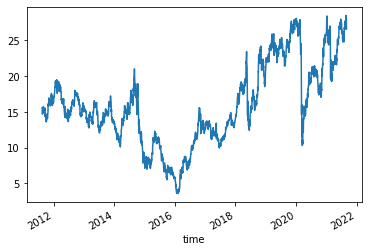

In [132]:
ativo.close.plot()

## Criando função que retorna plot da função escolhida

In [133]:
today-300

TypeError: unsupported operand type(s) for -: 'datetime.datetime' and 'int'

In [134]:
import os, time

In [135]:
s = time.strftime('%m/%d/%Y', time.gmtime(time.time()))

In [137]:
type(s)

str

In [146]:
from datetime import datetime, timedelta

In [150]:
s - datetime.timedelta(days=10)

AttributeError: type object 'datetime.datetime' has no attribute 'timedelta'

In [153]:
today= datetime.today()

In [156]:
today-timedelta(days=1000)

datetime.datetime(2018, 12, 8, 9, 55, 7, 131455)

In [162]:
(today - start).days

3006

In [ ]:
from datetime import datetime, timedelta

print (start,end )

In [ ]:
s - datetime.timedelta(days=10)

In [164]:
end = datetime.today()
(end - start).days

3006

In [4]:
janela = mt5.TIMEFRAME_D1

In [8]:
def retorna_plot(ativo, inicio, timeframe):
    mt5.initialize()
    from datetime import datetime
    start = inicio
    start = datetime.strptime(start, "%m/%d/%Y") #string to date
    end = datetime.today()
    dias = (end - start).days
    
    rates = mt5.copy_rates_from(ativo, timeframe, end,dias)
    ativo = pd.DataFrame(rates)
    
    ativo['time']=pd.to_datetime(ativo['time'], unit='s')
    ativo.index = ativo['time']
    mt5.shutdown()
    
    return ativo.close.plot()

<AxesSubplot:xlabel='time'>

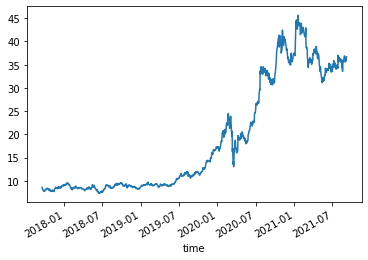

In [9]:
retorna_plot('WEGE3', '01/01/2019', janela)

<AxesSubplot:xlabel='time'>

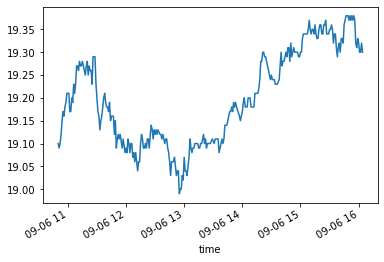

In [12]:
mt5.initialize()
from datetime import datetime
today= datetime.today()
# recebemos 10 barras de EURUSD H4 a partir de 01/10/2019 no fuso horário UTC
rates = mt5.copy_rates_from("GOLL4", mt5.TIMEFRAME_M1, today,300)
ativo = pd.DataFrame(rates)
ativo['time']=pd.to_datetime(ativo['time'], unit='s')
ativo.index = ativo['time']
ativo.close.plot()

In [13]:
ativo.tail()

,time,open,high,low,close,tick_volume,spread,real_volume
time,,,,,,,,
2021-09-06 16:00:00,2021-09-06 16:00:00,19.32,19.32,19.32,19.32,3,1,300
2021-09-06 16:01:00,2021-09-06 16:01:00,19.31,19.31,19.30,19.30,2,1,1400
2021-09-06 16:02:00,2021-09-06 16:02:00,19.31,19.31,19.30,19.30,4,1,3200
2021-09-06 16:03:00,2021-09-06 16:03:00,19.29,19.32,19.28,19.32,8,1,1300
2021-09-06 16:04:00,2021-09-06 16:04:00,19.31,19.31,19.30,19.30,2,2,200


# Utilizando a CopyRatesfrom pos

In [209]:
# estabelecemos a conexão ao MetaTrader 5
if not mt5.initialize():
    print("initialize() failed, error code =",mt5.last_error())
    quit()

In [210]:

# solicitamos 10 barras de GBPUSD D1 do dia atual
rates = mt5.copy_rates_from_pos("EMBR3", mt5.TIMEFRAME_D1, 0, 300)
 

In [211]:
# concluímos a conexão ao terminal MetaTrader 5
mt5.shutdown()
 

True

In [212]:
# exibimos cada elemento de dados recebidos numa nova linha
print("Exibimos os dados recebidos como estão")
for rate in rates:
    print(rate)

Exibimos os dados recebidos como estão
(1592870400, 8.59, 8.64, 8.37, 8.52, 16295, 1, 9311100)
(1592956800, 8.49, 8.73, 8.08, 8.09, 25804, 1, 13845400)
(1593043200, 8.1, 8.22, 7.9, 8.15, 20598, 1, 12510100)
(1593129600, 8.15, 8.26, 7.8, 7.83, 16735, 1, 10071200)
(1593388800, 7.94, 8.42, 7.84, 8.42, 25804, 1, 17457400)
(1593475200, 8.35, 8.36, 8.04, 8.09, 23700, 1, 14838600)
(1593561600, 8.27, 8.44, 8.08, 8.1, 22427, 1, 14158200)
(1593648000, 8.3, 8.66, 8.07, 8.17, 34097, 1, 19559200)
(1593734400, 8.16, 8.26, 8.02, 8.19, 8044, 1, 5181000)
(1593993600, 8.4, 8.51, 8.18, 8.47, 19933, 1, 12590400)
(1594080000, 8.34, 8.42, 8.18, 8.2, 16966, 1, 10032300)
(1594166400, 8.27, 8.3, 8.13, 8.18, 16922, 1, 9169700)
(1594252800, 8.19, 8.2, 7.96, 7.99, 18339, 1, 11094400)
(1594339200, 8., 8.09, 7.86, 8.06, 17365, 1, 9376200)
(1594598400, 8.12, 8.3, 8.06, 8.16, 21152, 1, 15040000)
(1594684800, 8.16, 8.17, 7.97, 8.01, 17757, 1, 12564300)
(1594771200, 8.16, 8.8, 8.11, 8.8, 39682, 1, 28614000)
(1594857600

(1627603200, 19.25, 19.46, 18.42, 18.59, 14472, 1, 10319500)
(1627862400, 18.79, 19.68, 18.6, 18.89, 19570, 1, 12336100)
(1627948800, 18.86, 19.03, 17.96, 18.92, 18806, 1, 11457100)
(1628035200, 18.91, 19.1, 18.26, 18.32, 13535, 1, 8066600)
(1628121600, 18.5, 18.94, 18.45, 18.62, 13861, 1, 7682400)
(1628208000, 18.55, 19.37, 18.55, 19.23, 12169, 1, 6959500)
(1628467200, 19.06, 19.2, 18.69, 18.98, 10432, 1, 5293400)
(1628553600, 19.2, 19.84, 19.08, 19.6, 32466, 1, 16262400)
(1628640000, 19.59, 19.97, 19.18, 19.93, 17565, 1, 11121800)
(1628726400, 19.94, 20.17, 19.3, 19.38, 14526, 1, 7477600)
(1628812800, 19.93, 20.85, 19.84, 20.79, 35756, 1, 20326400)
(1629072000, 20.76, 20.9, 19.34, 19.45, 30845, 1, 15163900)
(1629158400, 19.27, 19.27, 17.84, 18.16, 37309, 1, 21163500)
(1629244800, 18.31, 19.38, 18.08, 18.83, 32289, 1, 21417500)
(1629331200, 18.45, 19.72, 18.28, 19.56, 22892, 1, 13352300)
(1629417600, 19.27, 19.95, 19.14, 19.87, 17160, 1, 9725800)
(1629676800, 19.88, 21.15, 19.76, 20.9

In [213]:

# a partir dos dados recebidos criamos o DataFrame
rates_frame = pd.DataFrame(rates)
# convertemos o tempo em segundos no formato datetime
rates_frame['time']=pd.to_datetime(rates_frame['time'], unit='s')

In [214]:
rates_frame.shape

(300, 8)

<AxesSubplot:>

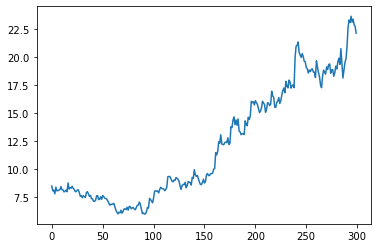

In [215]:
rates_frame.close.plot()

## Função copy_rates_range

In [58]:
from datetime import datetime

Rodar essa função para ver todos os fusos disponíveis

In [ ]:
pytz.all_timezones

In [78]:
timezone = pytz.timezone("Etc/GMT-3")

inicio = datetime(2021, 9, 27, hour = 9, tzinfo = timezone)
fim = datetime(2021, 9, 27, hour = 17, tzinfo = timezone)

In [83]:
# obtemos as barras com USDJPY M5 no intervalo 2020.01.10 00:00 - 2020.01.11 13:00 no fuso horário UTC
rates = mt5.copy_rates_range("WEGE3", mt5.TIMEFRAME_M1, inicio, fim)

In [84]:
# a partir dos dados recebidos criamos o DataFrame
rates_frame = pd.DataFrame(rates)
# convertemos o tempo em segundos no formato datetime
rates_frame['time']=pd.to_datetime(rates_frame['time'], unit='s')

In [85]:
rates_frame.head()

,time,open,high,low,close,tick_volume,spread,real_volume
0,2021-09-27 10:07:00,41.06,41.08,40.88,40.95,78,0,61200
1,2021-09-27 10:08:00,40.95,40.95,40.79,40.79,71,1,41300
2,2021-09-27 10:09:00,40.83,40.84,40.71,40.73,57,1,38100
3,2021-09-27 10:10:00,40.75,40.95,40.75,40.91,59,1,46000
4,2021-09-27 10:11:00,40.90,40.90,40.75,40.89,52,2,25600


<AxesSubplot:xlabel='time'>

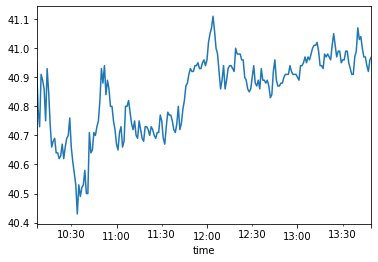

In [86]:
rates_frame.index = rates_frame['time']
rates_frame.close.plot()

In [87]:
rates_frame.shape

(223, 8)

## Função copy_ticks_from

COPY_TICKS_INFO - apenas as alterações no Bid & ASk

COPY_TICKS_TRADE - apenas alterações no volume

COPY_TICKS_ALL - todos os ticks

<AxesSubplot:xlabel='time'>

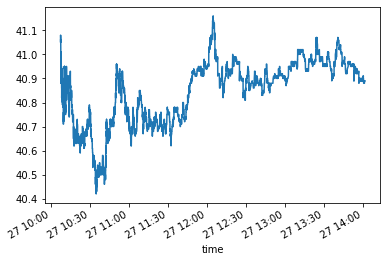

In [117]:
dados = mt5.copy_ticks_from("WEGE3",inicio,100000, mt5.COPY_TICKS_ALL)

# a partir dos dados recebidos criamos o DataFrame
dados_frame = pd.DataFrame(dados)

# convertemos o tempo em segundos no formato datetime
dados_frame['time']=pd.to_datetime(dados_frame['time'], unit='s')

dados_frame.index = dados_frame['time']
dados_frame['last'].plot()

In [118]:
dados_frame.head(70)

,time,bid,ask,last,volume,time_msc,flags,volume_real
time,,,,,,,,
2021-09-27 10:07:31,2021-09-27 10:07:31,0.0,0.00,41.06,3300,1632737251706,56,3300.0
2021-09-27 10:07:31,2021-09-27 10:07:31,0.0,0.00,41.06,2900,1632737251706,56,2900.0
2021-09-27 10:07:31,2021-09-27 10:07:31,0.0,0.00,41.06,4200,1632737251706,56,4200.0
2021-09-27 10:07:31,2021-09-27 10:07:31,0.0,0.00,41.06,3500,1632737251706,56,3500.0
2021-09-27 10:07:31,2021-09-27 10:07:31,0.0,0.00,41.06,10500,1632737251706,56,10500.0
...,...,...,...,...,...,...,...,...
2021-09-27 10:07:45,2021-09-27 10:07:45,40.9,40.95,40.91,200,1632737265582,4,200.0
2021-09-27 10:07:45,2021-09-27 10:07:45,40.9,40.94,40.91,200,1632737265881,4,200.0
2021-09-27 10:07:46,2021-09-27 10:07:46,40.9,40.94,40.90,300,1632737266146,88,300.0


## Função copy_ticks_range

In [121]:
# obtemos as barras com USDJPY M5 no intervalo 2020.01.10 00:00 - 2020.01.11 13:00 no fuso horário UTC
rates = mt5.copy_ticks_range("WEGE3", inicio, fim,  mt5.COPY_TICKS_ALL)

# a partir dos dados recebidos criamos o DataFrame
rates_frame = pd.DataFrame(rates)
# convertemos o tempo em segundos no formato datetime
rates_frame['time']=pd.to_datetime(rates_frame['time'], unit='s')

rates_frame.index = rates_frame['time']
rates_frame.head()

,time,bid,ask,last,volume,time_msc,flags,volume_real
time,,,,,,,,
2021-09-27 10:07:31,2021-09-27 10:07:31,0.0,0.0,41.06,3300,1632737251706,56,3300.0
2021-09-27 10:07:31,2021-09-27 10:07:31,0.0,0.0,41.06,2900,1632737251706,56,2900.0
2021-09-27 10:07:31,2021-09-27 10:07:31,0.0,0.0,41.06,4200,1632737251706,56,4200.0
2021-09-27 10:07:31,2021-09-27 10:07:31,0.0,0.0,41.06,3500,1632737251706,56,3500.0
2021-09-27 10:07:31,2021-09-27 10:07:31,0.0,0.0,41.06,10500,1632737251706,56,10500.0


<AxesSubplot:xlabel='time'>

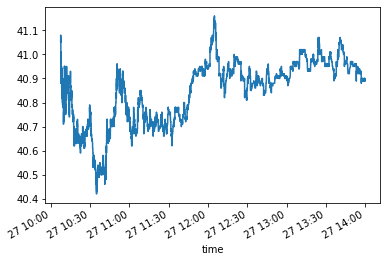

In [122]:
rates_frame['last'].plot()

# 5. Vamos mexer com as ordens

In [123]:
mt5.orders_total()

0

In [124]:
orders=mt5.orders_get(symbol="GBPUSD")
if orders is None:
    print("No orders on GBPUSD, error code={}".format(mt5.last_error()))
else:
    print("Total orders on GBPUSD:",len(orders))
    # exibimos todas as ordens ativas
    for order in orders:
        print(order)
print()

No orders on GBPUSD, error code=(-4, 'Terminal: Not found')



In [131]:
symbol = 'WEGE3'

In [132]:
ask=mt5.symbol_info_tick(symbol).ask

In [133]:
ask

40.9

In [135]:
action=mt5.ORDER_TYPE_BUY

mt5.order_calc_margin(action,symbol,10000,ask)

0.0

In [136]:
mt5.symbol_info(symbol).point

0.01

## Temos dinheiro para mandar a ordem?

In [224]:
symbol = 'OIBR3'

In [225]:
point=mt5.symbol_info(symbol).point

In [226]:
point

0.01

In [227]:
mt5.symbol_info_tick(symbol).ask-1*point

1.02

In [228]:
mt5.symbol_info_tick(symbol).ask+1*point

1.04

In [161]:
request = {
    "action": mt5.TRADE_ACTION_DEAL,
    "symbol": symbol,
    "volume": 1.0,
    "type": mt5.ORDER_TYPE_BUY,
    "price": mt5.symbol_info_tick(symbol).ask,
    "sl": mt5.symbol_info_tick(symbol).ask-1*point,
    "tp": mt5.symbol_info_tick(symbol).ask+1*point,
    "deviation": 5,
    "magic": 234000,
    "comment": "python script",
    "type_time": mt5.ORDER_TIME_DAY,
    "type_filling": mt5.ORDER_FILLING_RETURN,
}
 
# verificamos e exibimos o resultado como está
result = mt5.order_check(request)

In [162]:
print(result)

OrderCheckResult(retcode=10014, balance=0.0, equity=0.0, profit=0.0, margin=0.0, margin_free=0.0, margin_level=0.0, comment='Invalid volume', request=TradeRequest(action=5, magic=234000, order=0, symbol='OIBR3', volume=1.0, price=1.03, stoplimit=0.0, sl=0.030000000000000027, tp=2.0300000000000002, deviation=10, type=0, type_filling=2, type_time=1, expiration=0, comment='python script', position=0, position_by=0))


Aparentemente não temos balanço, mas isso se deve mais ao fato da Clear não refletir no Metatrader as configurações da nossa conta

In [198]:
symbol_info = mt5.symbol_info(symbol)

if symbol_info is None:
    print(symbol, "not found, can not call order_check()")
    mt5.shutdown()
    quit()

## Estrutura de envio de ordens

In [236]:
if not mt5.initialize():
    print("initialize() failed, error code =",mt5.last_error())
    quit()

In [264]:
ordem['price'] = 0

In [268]:
symbol

'OIBR3'

In [276]:
ordem = {
    "action": mt5.TRADE_ACTION_DEAL,
    "symbol": symbol,
    "volume": 100.0,
    "type": mt5.ORDER_TYPE_BUY,
    "price": mt5.symbol_info_tick(symbol).ask-1*point,
    "sl": mt5.symbol_info_tick(symbol).ask-2*point,
    "tp": mt5.symbol_info_tick(symbol).ask+1*point,
    "deviation": 0,
    "magic": 1,
    "comment": "python script",
    "type_time": mt5.ORDER_TIME_GTC,
    "type_filling": mt5.ORDER_FILLING_RETURN,
}

In [277]:
result = mt5.order_send(ordem)

In [278]:
result

OrderSendResult(retcode=10009, deal=0, order=2176609438, volume=100.0, price=0.0, bid=0.0, ask=0.0, comment='Request executed', request_id=5, retcode_external=0, request=TradeRequest(action=1, magic=1, order=0, symbol='OIBR3', volume=100.0, price=1.0, stoplimit=0.0, sl=0.99, tp=1.02, deviation=0, type=0, type_filling=2, type_time=0, expiration=0, comment='python script', position=0, position_by=0))

In [273]:
mt5.account_info()

AccountInfo(login=1000080735, trade_mode=2, leverage=1, limit_orders=0, margin_so_mode=1, trade_allowed=True, trade_expert=True, margin_mode=0, currency_digits=2, fifo_close=False, balance=0.0, credit=0.0, profit=0.0, equity=0.0, margin=0.0, margin_free=0.0, margin_level=0.0, margin_so_call=0.0, margin_so_so=0.0, margin_initial=0.0, margin_maintenance=0.0, assets=0.0, liabilities=0.0, commission_blocked=0.0, name='VICTOR NOGUEIRA CORTEZ GOMES', server='ClearInvestimentos-CLEAR', currency='BRL', company='Clear (XP Investimentos CCTVM)')

Abri uma ordem manualmente

Vamos ver se o Python identifica aqui

In [279]:
mt5.orders_total()

0

In [280]:
mt5.orders_get()

()

Agora que temos uma posição de OIBR3 aberta

In [287]:
mt5.positions_total()

0

In [282]:
mt5.positions_get()

(TradePosition(ticket=2176609438, time=1632756294, time_msc=1632756294365, time_update=1632756294, time_update_msc=1632756294365, type=0, magic=1, identifier=2176609438, reason=3, volume=100.0, price_open=1.01, sl=0.99, tp=1.02, price_current=1.0, swap=0.0, profit=-1.0, symbol='OIBR3', comment='python script', external_id=''),)

In [283]:
from_date=datetime(2020,1,1)
to_date=datetime.now()
history_orders=mt5.history_orders_total(from_date, datetime.now())

In [284]:
history_orders

6

In [285]:
from_date=datetime(2020,1,1)
to_date=datetime.now()
history_orders=mt5.history_orders_get(from_date, to_date)

In [286]:
history_orders

(TradeOrder(ticket=2173572252, time_setup=1631274416, time_setup_msc=1631274416784, time_done=1631274418, time_done_msc=1631274418312, time_expiration=0, type=0, type_time=0, type_filling=2, state=5, magic=0, position_id=0, position_by_id=0, reason=0, volume_initial=100.0, volume_current=100.0, price_open=0.0, sl=1.01, tp=1.01, price_current=1.01, price_stoplimit=0.0, symbol='OIBR3', comment='[MG21] Garantia disponível de R', external_id=''),
 TradeOrder(ticket=2173572288, time_setup=1631274438, time_setup_msc=1631274438595, time_done=1631274438, time_done_msc=1631274438603, time_expiration=0, type=0, type_time=0, type_filling=2, state=5, magic=0, position_id=0, position_by_id=0, reason=0, volume_initial=100.0, volume_current=100.0, price_open=0.0, sl=0.0, tp=0.0, price_current=1.02, price_stoplimit=0.0, symbol='OIBR3', comment='[MG21] Garantia disponível de R', external_id=''),
 TradeOrder(ticket=2173572878, time_setup=1631274721, time_setup_msc=1631274721704, time_done=1631274721, ti